<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li></ul></div>

# Выбор локации для нефтяной скважины

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [6]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [8]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
datasets = [data_0, data_1, data_2]
for i in range(0, 3):
    datasets[i] = datasets[i].drop('id', axis=1)

**Вывод**

Единственное преобразование - удалила в каждом датасете колонку `id`, т.к. она не должна влиять на результаты обучения.

В остальном данные изначально подготовлены для задачи: нет пропусков, нечисловых признаков, названия колонок соответствуют общепринятым правилам стиля, не требуется преобразование типов.

## Обучение и проверка модели

In [10]:
def learn_for_region(data, region_ind, answers):
    features = data.drop('product', axis=1)
    target = data['product']
    
    features_train, features_valid, target_train, target_valid  = \
    train_test_split(features, target, test_size=0.25, random_state=12345)
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    
    print(f'Регион {region_ind+1}: средний запас предсказанного сырья {predictions_valid.mean():.2f} \
(RMSE модели {mean_squared_error(target_valid, predictions_valid)**0.5:.6f}, \
R2 {r2_score(target_valid, predictions_valid):.6f})')
    
    target_valid = target_valid.reset_index(drop=True)
    
    answers.append([target_valid, pd.Series(predictions_valid, target_valid.index)])

In [11]:
answers = []
for i in range(0, 3):
    learn_for_region(datasets[i], i, answers)

Регион 1: средний запас предсказанного сырья 92.59 (RMSE модели 37.579422, R2 0.279943)
Регион 2: средний запас предсказанного сырья 68.73 (RMSE модели 0.893099, R2 0.999623)
Регион 3: средний запас предсказанного сырья 94.97 (RMSE модели 40.029709, R2 0.205248)


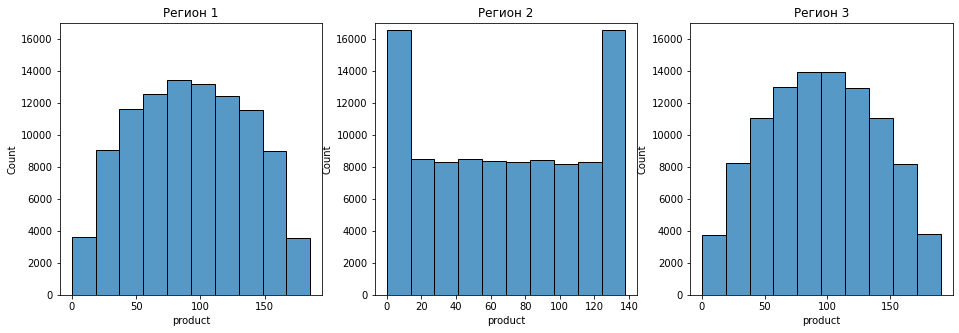

In [12]:
fig, axis = plt.subplots(1,3, figsize=(16, 5))

for i in range(0,3):
    g = sns.histplot(datasets[i]['product'], bins=10, ax=axis[i])
    g.set(ylim=(0, 17000))
    g.set_title(f'Регион {i+1}') 

**Вывод**

По итогам обучения каждой модели самую точную модель получили на данных второго региона, на остальных средняя квадратичная ошибка равна примерно половине среднего запаса предсказанного сырья. 

По графику распределения целевого показателя видим, что по второму региону он имеет распределение, близкое к равномерному с выбросами по краям, а у первого и третьего распределения достаточно похожи между собой. 

Соответственно и метрики моделей первого и третьего региона схожи. А у второй модели потому метрики и лучше, потому что в большинстве случае правильный ответ примерно одинаков.

## Подготовка к расчёту прибыли

In [13]:
REVENUE_1 = 450*10**3
BUDGET = 10**10
QUANTITY = 200
TOTAL_QUANTITY = 500
ALPHA = 0.025
BOOTSTRAP_SAMPLES = 1000
print(f'Средний достаточный объем сырья для безубыточной разработки новой скважины составляет {BUDGET/REVENUE_1/QUANTITY:.2f}')

Средний достаточный объем сырья для безубыточной разработки новой скважины составляет 111.11


In [14]:
def revenue(target, predictions, QUANTITY, BUDGET, REVENUE_1):
    predictions_sorted = predictions.sort_values(ascending=False)
    target_selected = target[predictions_sorted.index][:QUANTITY]
    return target_selected.sum() * REVENUE_1 - BUDGET

**Вывод**

Средний достаточный объем сырья для безубыточной разработки новой скважины составляет 111.11 тыс. баррелей, что больше среднего запаса предсказанного сырья, рассчитанного моделью для каждого региона.

## Расчёт прибыли и рисков 

Регион 1: средняя прибыль с 200 скважин 425938526.91
          вероятность убытка 6.0%
          с вероятность 95% средняя прибыль будет варьироваться в пределах от -102090094.84 до 947976353.36

Регион 2: средняя прибыль с 200 скважин 518259493.70
          вероятность убытка 0.3%
          с вероятность 95% средняя прибыль будет варьироваться в пределах от 128123231.43 до 953612982.07

Регион 3: средняя прибыль с 200 скважин 420194005.34
          вероятность убытка 6.2%
          с вероятность 95% средняя прибыль будет варьироваться в пределах от -115852609.16 до 989629939.84



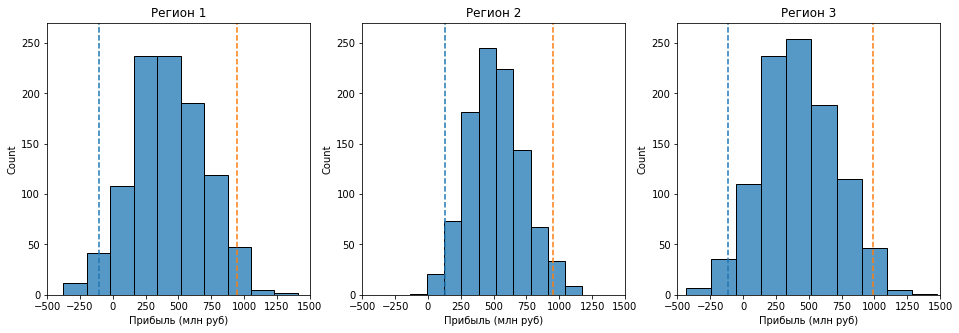

In [15]:
state = np.random.RandomState(12345)

fig, axis = plt.subplots(1,3, figsize=(16, 5))

for i in range(0,3):
    values = []
    for j in range(0, BOOTSTRAP_SAMPLES):     
        target_subsample = answers[i][0].sample(n=TOTAL_QUANTITY, replace=True, random_state=state)
        predictions_subsample = answers[i][1][target_subsample.index]
        
        value = revenue(target_subsample, predictions_subsample, QUANTITY, BUDGET, REVENUE_1)
        values.append(value)
        
    values = pd.Series(values) 
    
    lower = values.quantile(ALPHA)
    upper = values.quantile(1-ALPHA)
    
    print(f'Регион {i+1}: средняя прибыль с {QUANTITY} скважин {values.mean():.2f}')
    print(f'          вероятность убытка {(values<0).mean():.1%}')
    print(f'          с вероятность {1-2*ALPHA:.0%} средняя прибыль будет варьироваться в пределах \
от {lower:.2f} до {upper:.2f}')
    print()
    
    plt.subplot(1, 3, i+1)
    
    g = sns.histplot(values/10**6, bins=10)
    g.set(xlim=(-500, 1500))
    g.set(ylim=(0, 270))
    g.set_title(f'Регион {i+1}')    
    g.set_xlabel('Прибыль (млн руб)')
    
    g_lower = lower/10**6
    g_upper = upper/10**6
    
    plt.plot([g_lower, g_lower], [0, 270], linestyle='--')
    plt.plot([g_upper, g_upper], [0, 270], linestyle='--')

**Вывод**

Наилучшим вариантом для бурения новых скважин является второй регион - вероятность убытка 0.3%, в 95% случаях прибыль составит от 128 до 953 млн рублей. 

В остальных двух регионах вероятность убытка около 6%.